Habilidades que Necesitarás

Para sobrevivir en Runway Tech, necesitarás:

    Diseñar una arquitectura de red neuronal con la precisión de una pasarela de alta costura.
    Dominar la propagación hacia adelante y hacia atrás (forward propagation y backpropagation) con la elegancia de una colección de otoño/invierno.
    Domar funciones de activación como ReLU y Softmax, haciéndolas desfilar sin tropiezos.
    Perfeccionar la función de pérdida, porque cada pixel fuera de lugar es una catástrofe.
    Dominar el descenso de gradiente, para que los pesos de tu modelo no sigan tomando malas decisiones (como ese vestido de la temporada pasada).
    Combatir el sobreajuste con la precisión de un sastre de élite — Dropout es tu aliado.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

2025-02-14 15:35:17.994669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 15:35:18.005692: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-14 15:35:18.044575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739558118.104100   17470 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739558118.120705   17470 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-14 15:35:18.167076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# Cargar datos de MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los datos (0-1) y convertir a 1D
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# Convertir etiquetas a one-hot encoding
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)

# Dividir en entrenamiento y validación
X_val, y_val = X_train[50000:], y_train_one_hot[50000:]
X_train, y_train = X_train[:50000], y_train_one_hot[:50000]

In [8]:
class NeuralNetwork:
    def __init__(self, n_inputs=784, n_outputs=10, hidden_units=128, reg=0.001):
        np.random.seed(0)
        self.reg = reg  # Regularización L2
        self.w1 = np.random.randn(hidden_units, n_inputs) / np.sqrt(n_inputs)
        self.b1 = np.zeros(hidden_units)
        self.w2 = np.random.randn(n_outputs, hidden_units) / np.sqrt(hidden_units)
        self.b2 = np.zeros(n_outputs)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / exp_x.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.h = self.relu(X @ self.w1.T + self.b1)
        self.output = self.softmax(self.h @ self.w2.T + self.b2)
        return np.argmax(self.output, axis=1)

    def train(self, X, Y, X_val, Y_val, epochs=50, lr=0.01):
        train_losses, val_losses = [], []
        for epoch in range(epochs):
            # FORWARD
            h = self.relu(X @ self.w1.T + self.b1)
            f = self.softmax(h @ self.w2.T + self.b2)

            # BACKWARD
            d_out = f - Y
            d_h = (h > 0) * (d_out @ self.w2)

            Dw2 = d_out.T @ h / len(X) + self.reg * self.w2
            Db2 = d_out.mean(axis=0)
            Dw1 = d_h.T @ X / len(X) + self.reg * self.w1
            Db1 = d_h.mean(axis=0)

            self.w1 -= lr * Dw1
            self.b1 -= lr * Db1
            self.w2 -= lr * Dw2
            self.b2 -= lr * Db2

            # Calcular pérdidas
            loss = -np.mean(np.sum(Y * np.log(f + 1e-8), axis=1))
            val_pred = self.softmax(self.relu(X_val @ self.w1.T + self.b1) @ self.w2.T + self.b2)
            val_loss = -np.mean(np.sum(Y_val * np.log(val_pred + 1e-8), axis=1))
            train_losses.append(loss)
            val_losses.append(val_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Training Loss = {loss:.4f}, Validation Loss = {val_loss:.4f}")

        # Graficar pérdidas
        plt.plot(train_losses, label="Train Loss")
        plt.plot(val_losses, label="Validation Loss")
        plt.legend()
        plt.show()

Epoch 0: Training Loss = 2.3234, Validation Loss = 2.3215
Epoch 10: Training Loss = 2.2658, Validation Loss = 2.2627
Epoch 20: Training Loss = 2.2123, Validation Loss = 2.2079
Epoch 30: Training Loss = 2.1613, Validation Loss = 2.1556
Epoch 40: Training Loss = 2.1118, Validation Loss = 2.1046


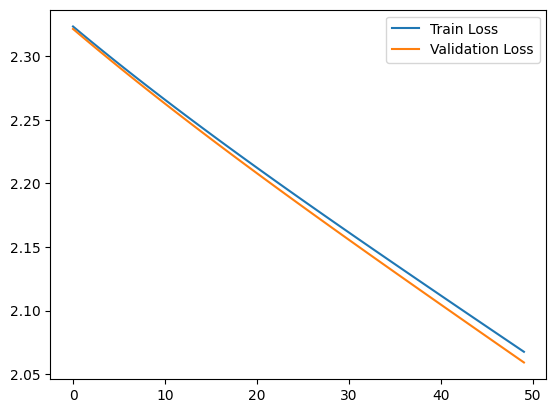

Accuracy en Test Set: 0.4702


In [9]:
# Entrenar la red neuronal
nn = NeuralNetwork()
nn.train(X_train, y_train, X_val, y_val, epochs=50, lr=0.01)

# Evaluar en el conjunto de prueba
predictions = nn.forward(X_test)
accuracy = np.mean(predictions == np.argmax(y_test_one_hot, axis=1))
print(f"Accuracy en Test Set: {accuracy:.4f}")

Conclusion:  

- El modelo está aprendiendo, pero su rendimiento es bajo (47% de precisión).
- No hay overfitting, pero sí un posible underfitting (el modelo no está aprendiendo lo suficiente).
- Se pueden hacer ajustes en la arquitectura, optimización y normalización para mejorar los resultados.